In [23]:
from skimage.filters import gabor, gaussian
from skimage import data, io
from matplotlib import pyplot as plt
from PIL import Image 
from skimage.color import rgb2hsv
import math
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets, transforms
from torchvision import models
from torch.autograd import Variable
from torch.utils.data.sampler import SubsetRandomSampler
import time
import numpy as np
import shutil
import os

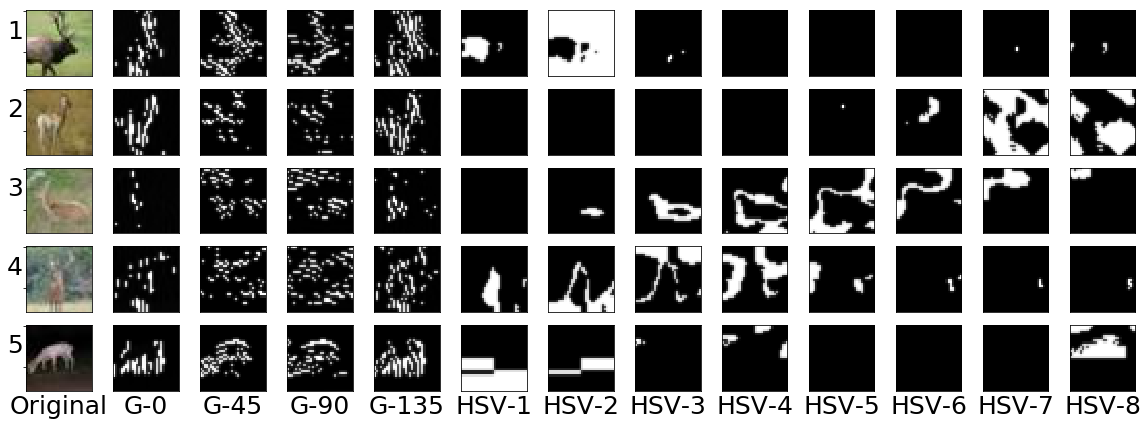

In [27]:
c10 = datasets.ImageFolder("images_deer")

waves = [2.5/math.sqrt(2), 8*math.sqrt(2), 16*math.sqrt(2), 32*math.sqrt(2)]
freq = [1/x for x in waves]
ori = [0, 45, 90, 135]

fig, ax = plt.subplots(nrows=5, ncols=5+8, figsize=(20, 7))

num_img = 5

count1 = 1
count2 = 0 
x_labels = ["Original", "G-0", "G-45", "G-90", "G-135", "HSV-1", "HSV-2", "HSV-3", "HSV-4", "HSV-5", "HSV-6", "HSV-7", "HSV-8"]
for img, label in c10:
    pix = np.array(img.convert('LA'))
    ax[count1-1, 0].imshow(img)
    ax[count1-1, 0].set_yticklabels(['      '])
    ax[count1-1, 0].set_xticklabels([])
    ax[count1-1, 0].get_xaxis().set_ticks([])
    #ax[count1-1, 0].get_yaxis().set_ticks([])
    ax[count1-1, 0].set_ylabel(str(count1), fontsize=25, rotation='horizontal')
    if count1 == num_img:
        ax[count1-1, 0].set_xlabel(x_labels[0], fontsize=25)

    track = 0
    for count, j in enumerate(ori):
        filt_real, filt_imag = gabor(pix[:,:,0], frequency = freq[0], theta = j*180 / np.pi)
        ax[count1-1][count+1].imshow(gaussian(filt_real + filt_imag, sigma=0.3*waves[0]), cmap='gray')
        ax[count1-1][count+1].set_yticklabels([])
        ax[count1-1][count+1].set_xticklabels([])
        ax[count1-1][count+1].get_xaxis().set_ticks([])
        ax[count1-1][count+1].get_yaxis().set_ticks([])
        if count1 == num_img:
            ax[count1-1][count+1].set_xlabel(x_labels[count+1], fontsize=25)
        track = count+1

    hsv_img = rgb2hsv(img)
    hue_img = hsv_img[:,:,0]
    cmax = 0

    for i in range(32):
        if cmax < max(hue_img[i]):
            cmax = max(hue_img[i])

    filtered = np.ndarray([32,32,8])

    threshs = [cmax/8 * i for i in range(9)]

    for i in range(1,9):
        for j in range(32):
            for k in range(32):
                if hsv_img[j,k,0] > threshs[i-1] and hsv_img[j,k,0] < threshs[i]:
                    filtered[j,k,i-1] = 255
                else:
                    filtered[j,k,i-1] = 0

    for i in range(8):
        ax[count1-1][track+1+i].imshow(gaussian(filtered[:,:,i], sigma=0.3*waves[0]), cmap='gray')
        ax[count1-1][track+1+i].set_yticklabels([])
        #ax[count1-1][track+1+i].set_xticklabels([])
        ax[count1-1][track+1+i].get_xaxis().set_ticks([])
        ax[count1-1][track+1+i].get_yaxis().set_ticks([])
        if count1 == num_img:
            ax[count1-1][track+1+i].set_xlabel(x_labels[track+1+i], fontsize=25)
    count1+=1
plt.show()